# Data Aquisition



In [10]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    print("Downloading...")
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    print("Extracting...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()


## Run the following code in your terminal window to install required packages

```
conda install -c conda-forge opencv
```

and then 

```
conda install -c conda-forge pathlib
```


In [ ]:
import os
import zipfile
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

if not os.path.exists("cats_and_dogs_filtered"):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Extracting...


# Problem Formulation 

With this numerical data, we find that the folder is split into two categories - cats and dogs. Since this data is appropriately grouped, we can use this data for classification purposes. Once we train our model, we can use it to discern images based on their properties.


# Preprocessing

Once retrieving the data, we now want to store these images with a numerical representation. Since they are .JPG files, we can decompose them into 3 matrices representing the levels of intensity of red, green, and blue. This is known as an RGB Tensor.

Tensor array for cat.952.jpg:
[[[0.21568628 0.1764706  0.14117648]
  [0.1882353  0.14901961 0.11372549]
  [0.14509805 0.10588235 0.07058824]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 [[0.15294118 0.11372549 0.07843138]
  [0.13725491 0.09803922 0.0627451 ]
  [0.11372549 0.07450981 0.03921569]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 [[0.11372549 0.07450981 0.03921569]
  [0.10588235 0.06666667 0.03137255]
  [0.09803922 0.05882353 0.02352941]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 ...

 [[0.39215687 0.36862746 0.30588236]
  [0.39215687 0.36862746 0.30588236]
  [0.39215687 0.3647059  0.29411766]
  ...
  [0.28627452 0.25490198 0.21176471]
  [0.2784314  0.25490198 0.20784314]
  [0.27450982 0.2509804  0.20392157]]

 [[0.3882353  0.3647059  0.3019608 ]
  [0.38

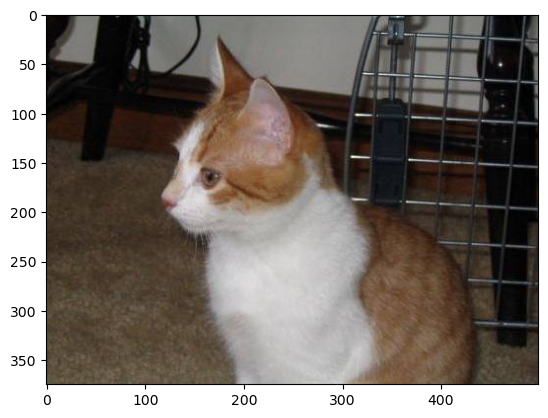

Tensor array for cat.946.jpg:
[[[0.56078434 0.6156863  0.61960787]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.25882354 0.27450982 0.2784314 ]
  [0.25882354 0.27450982 0.2784314 ]
  [0.25882354 0.27450982 0.2784314 ]]

 [[0.56078434 0.6156863  0.61960787]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.27058825 0.28627452 0.2901961 ]
  [0.27058825 0.28627452 0.2901961 ]
  [0.27058825 0.28627452 0.2901961 ]]

 [[0.5568628  0.6117647  0.6156863 ]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.28235295 0.29803923 0.3019608 ]
  [0.28235295 0.29803923 0.3019608 ]
  [0.28235295 0.29803923 0.3019608 ]]

 ...

 [[0.49019608 0.48235294 0.5019608 ]
  [0.48235294 0.4745098  0.49411765]
  [0.4745098  0.46666667 0.4862745 ]
  ...
  [0.3254902  0.23921569 0.15686275]
  [0.31764707 0.23137255 0.14901961]
  [0.3137255  0.22745098 0.14509805]]

 [[0.5254902  0.5176471  0.5294118 ]
  [0.51

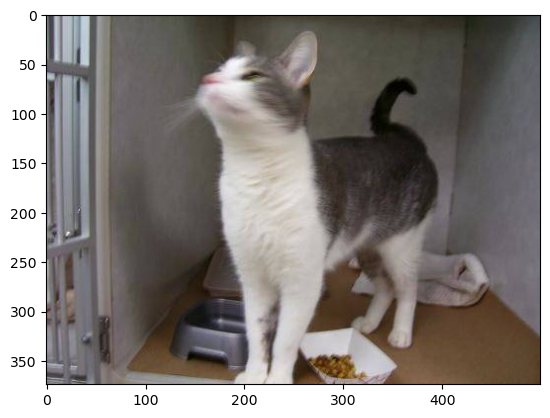

Tensor array for cat.6.jpg:
[[[0.95686275 0.85490197 0.8980392 ]
  [0.8392157  0.7372549  0.78039217]
  [0.80784315 0.7058824  0.7490196 ]
  ...
  [0.7490196  0.7529412  0.77254903]
  [0.7294118  0.72156864 0.7411765 ]
  [0.7647059  0.75686276 0.76862746]]

 [[0.95686275 0.85490197 0.8980392 ]
  [0.8392157  0.7372549  0.78039217]
  [0.8039216  0.7019608  0.74509805]
  ...
  [0.73333335 0.7294118  0.7529412 ]
  [0.69411767 0.6862745  0.7058824 ]
  [0.72156864 0.7137255  0.7254902 ]]

 [[0.9529412  0.8509804  0.89411765]
  [0.8392157  0.7372549  0.78039217]
  [0.8039216  0.7019608  0.74509805]
  ...
  [0.7137255  0.70980394 0.7294118 ]
  [0.6666667  0.64705884 0.6627451 ]
  [0.6784314  0.6627451  0.6666667 ]]

 ...

 [[0.53333336 0.16862746 0.21176471]
  [0.47843137 0.11764706 0.16078432]
  [0.4862745  0.12156863 0.16470589]
  ...
  [0.38431373 0.09411765 0.18431373]
  [0.38431373 0.08627451 0.1882353 ]
  [0.4392157  0.14117648 0.24313726]]

 [[0.54901963 0.18431373 0.22745098]
  [0.4980

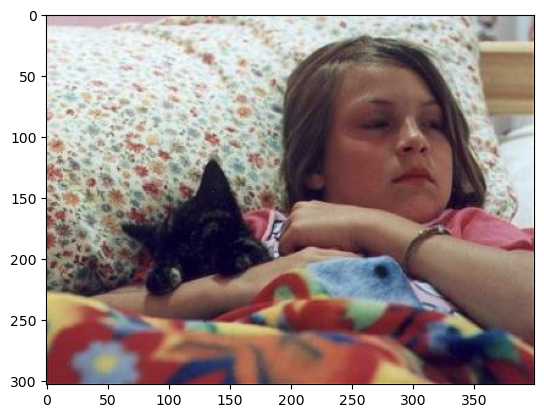

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cats_and_dogs_filtered/train/cats"

iteration = 0
for filename in os.listdir(folder_path):
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
        if iteration < 3:
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"{filename} not found")
                continue
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Convert to tensor (normalized float32 numpy array)
            tensor = img_rgb.astype('float32') / 255.0

            # Print the tensor array
            print(f"Tensor array for {filename}:")
            print(tensor)
            print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
            plt.imshow(img_rgb)
            plt.show()
            # show just one image and tensor
            iteration += 1
        else:
            break

Now.... The dogs 🐶 🐕

Tensor array for cat.952.jpg:
[[[0.21568628 0.1764706  0.14117648]
  [0.1882353  0.14901961 0.11372549]
  [0.14509805 0.10588235 0.07058824]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 [[0.15294118 0.11372549 0.07843138]
  [0.13725491 0.09803922 0.0627451 ]
  [0.11372549 0.07450981 0.03921569]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 [[0.11372549 0.07450981 0.03921569]
  [0.10588235 0.06666667 0.03137255]
  [0.09803922 0.05882353 0.02352941]
  ...
  [0.3372549  0.34117648 0.32156864]
  [0.36862746 0.37254903 0.3529412 ]
  [0.3882353  0.39215687 0.37254903]]

 ...

 [[0.39215687 0.36862746 0.30588236]
  [0.39215687 0.36862746 0.30588236]
  [0.39215687 0.3647059  0.29411766]
  ...
  [0.28627452 0.25490198 0.21176471]
  [0.2784314  0.25490198 0.20784314]
  [0.27450982 0.2509804  0.20392157]]

 [[0.3882353  0.3647059  0.3019608 ]
  [0.38

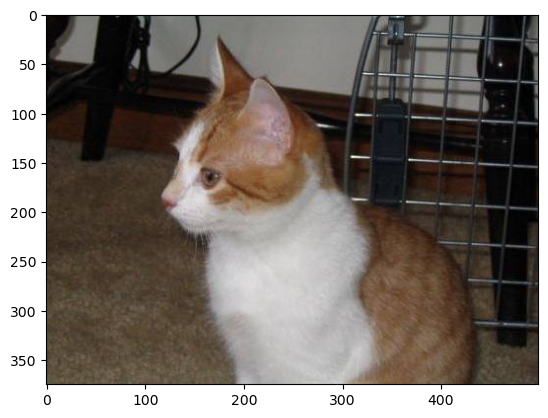

Tensor array for cat.946.jpg:
[[[0.56078434 0.6156863  0.61960787]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.25882354 0.27450982 0.2784314 ]
  [0.25882354 0.27450982 0.2784314 ]
  [0.25882354 0.27450982 0.2784314 ]]

 [[0.56078434 0.6156863  0.61960787]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.27058825 0.28627452 0.2901961 ]
  [0.27058825 0.28627452 0.2901961 ]
  [0.27058825 0.28627452 0.2901961 ]]

 [[0.5568628  0.6117647  0.6156863 ]
  [0.4509804  0.49411765 0.5019608 ]
  [0.36078432 0.38039216 0.40392157]
  ...
  [0.28235295 0.29803923 0.3019608 ]
  [0.28235295 0.29803923 0.3019608 ]
  [0.28235295 0.29803923 0.3019608 ]]

 ...

 [[0.49019608 0.48235294 0.5019608 ]
  [0.48235294 0.4745098  0.49411765]
  [0.4745098  0.46666667 0.4862745 ]
  ...
  [0.3254902  0.23921569 0.15686275]
  [0.31764707 0.23137255 0.14901961]
  [0.3137255  0.22745098 0.14509805]]

 [[0.5254902  0.5176471  0.5294118 ]
  [0.51

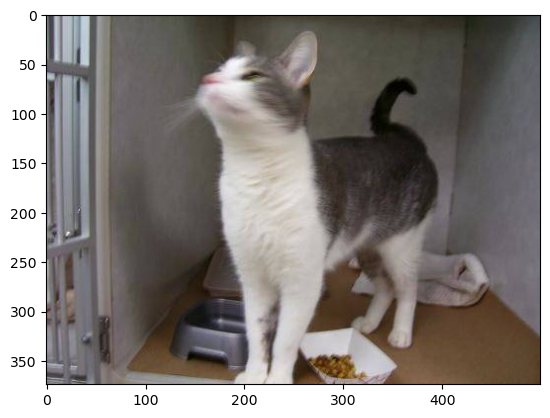

Tensor array for cat.6.jpg:
[[[0.95686275 0.85490197 0.8980392 ]
  [0.8392157  0.7372549  0.78039217]
  [0.80784315 0.7058824  0.7490196 ]
  ...
  [0.7490196  0.7529412  0.77254903]
  [0.7294118  0.72156864 0.7411765 ]
  [0.7647059  0.75686276 0.76862746]]

 [[0.95686275 0.85490197 0.8980392 ]
  [0.8392157  0.7372549  0.78039217]
  [0.8039216  0.7019608  0.74509805]
  ...
  [0.73333335 0.7294118  0.7529412 ]
  [0.69411767 0.6862745  0.7058824 ]
  [0.72156864 0.7137255  0.7254902 ]]

 [[0.9529412  0.8509804  0.89411765]
  [0.8392157  0.7372549  0.78039217]
  [0.8039216  0.7019608  0.74509805]
  ...
  [0.7137255  0.70980394 0.7294118 ]
  [0.6666667  0.64705884 0.6627451 ]
  [0.6784314  0.6627451  0.6666667 ]]

 ...

 [[0.53333336 0.16862746 0.21176471]
  [0.47843137 0.11764706 0.16078432]
  [0.4862745  0.12156863 0.16470589]
  ...
  [0.38431373 0.09411765 0.18431373]
  [0.38431373 0.08627451 0.1882353 ]
  [0.4392157  0.14117648 0.24313726]]

 [[0.54901963 0.18431373 0.22745098]
  [0.4980

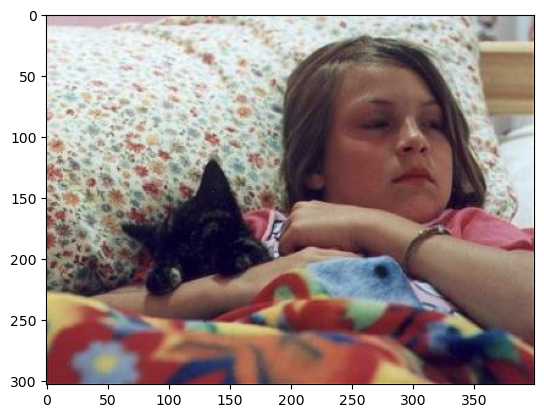

In [19]:
iteration = 0
for filename in os.listdir(folder_path):
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
        if iteration < 3:
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: Unable to read {filename}")
                continue

            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Convert to tensor (normalized float32 numpy array)
            tensor = img_rgb.astype('float32') / 255.0

            # Print the tensor array
            print(f"Tensor array for {filename}:")
            print(tensor)
            print(f"Shape: {tensor.shape}, dtype: {tensor.dtype}")

            # Optionally, display the image and tensor side by side
            plt.imshow(img_rgb)
            plt.show()
            # show just one image and tensor
            iteration += 1
        else:
            break
        



Now, let's decompose one of these images to display the three matrices that compose the tensor